In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Loan%20Eligible%20Dataset/loan-train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Loan%20Eligible%20Dataset/loan-train.csv")
train_data.head().append(train_data.tail())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
train_data.drop('Loan_ID', axis=1, inplace=True)

train_data['Credit_History'] = train_data['Credit_History'].astype('object')
test_data['Credit_History'] = test_data['Credit_History'].astype('object')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [10]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data = train_data.dropna()
data.shape

(480, 12)

Eligible customers: 422
Non-Eligible customers: 192



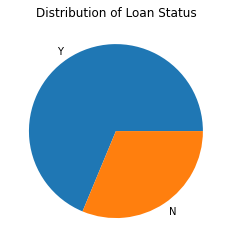

In [12]:
print("Eligible customers: " + str(len(train_data[train_data['Loan_Status'] == 'Y'])))
print("Non-Eligible customers: " + str(len(train_data[train_data['Loan_Status'] == 'N'])))
print()

plt.pie(train_data['Loan_Status'].value_counts(), labels=['Y', 'N'])
plt.title('Distribution of Loan Status')
plt.show()

In [13]:
categorical_cols = [cname for cname in train_data.columns
                   if train_data[cname].dtype == 'object'
                   and cname != 'Loan_Status']
numerical_cols = [cname for cname in train_data.columns
                 if train_data[cname].dtype != 'object']

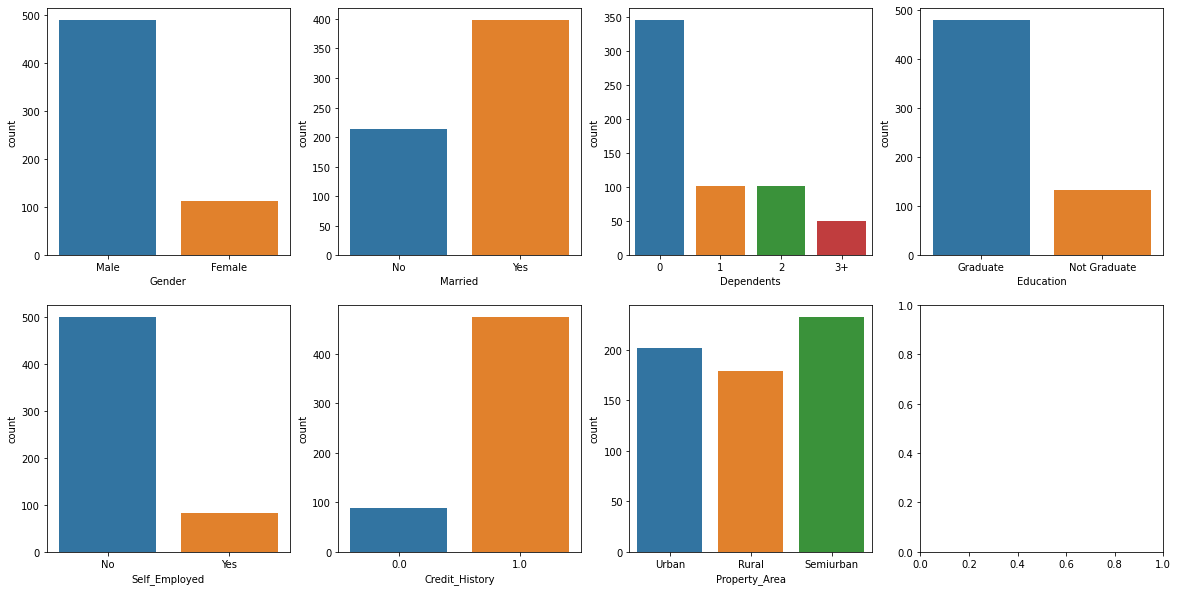

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, feature in enumerate(categorical_cols):
    sns.countplot(x=feature, data=train_data, ax=axes[i//4, i%4])

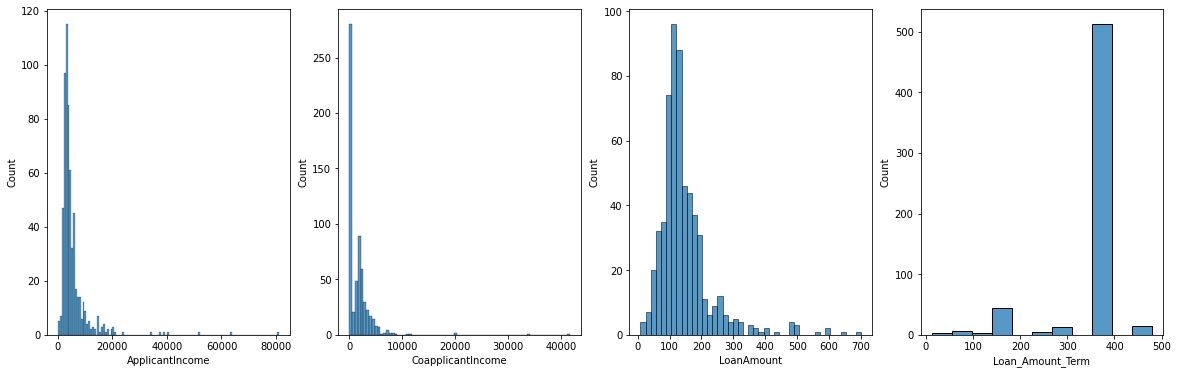

In [15]:
fign, axesn = plt.subplots(1, 4, figsize=(20, 6))
for i, num_col in enumerate(numerical_cols):
    sns.histplot(data=train_data, x=num_col, ax=axesn[i])

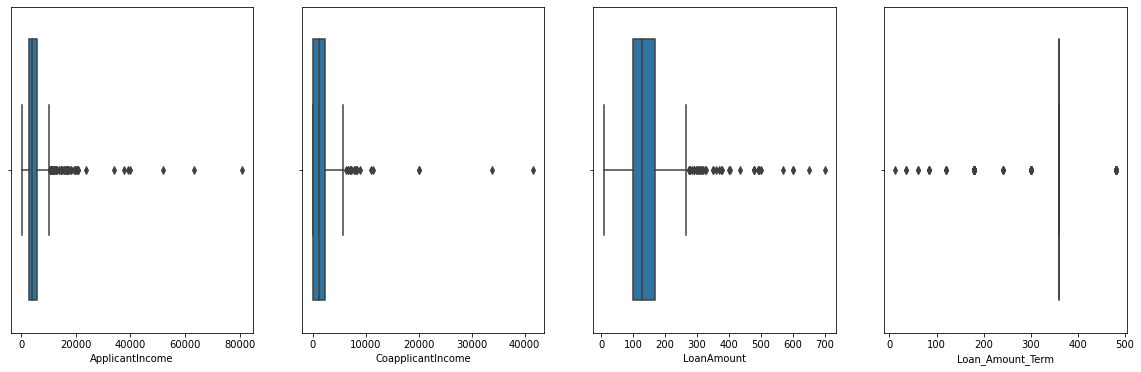

In [16]:
figb, axesb = plt.subplots(1, 4, figsize=(20, 6))
for i, num_col in enumerate(numerical_cols):
    sns.boxplot(x=num_col, data=train_data, ax=axesb[i])

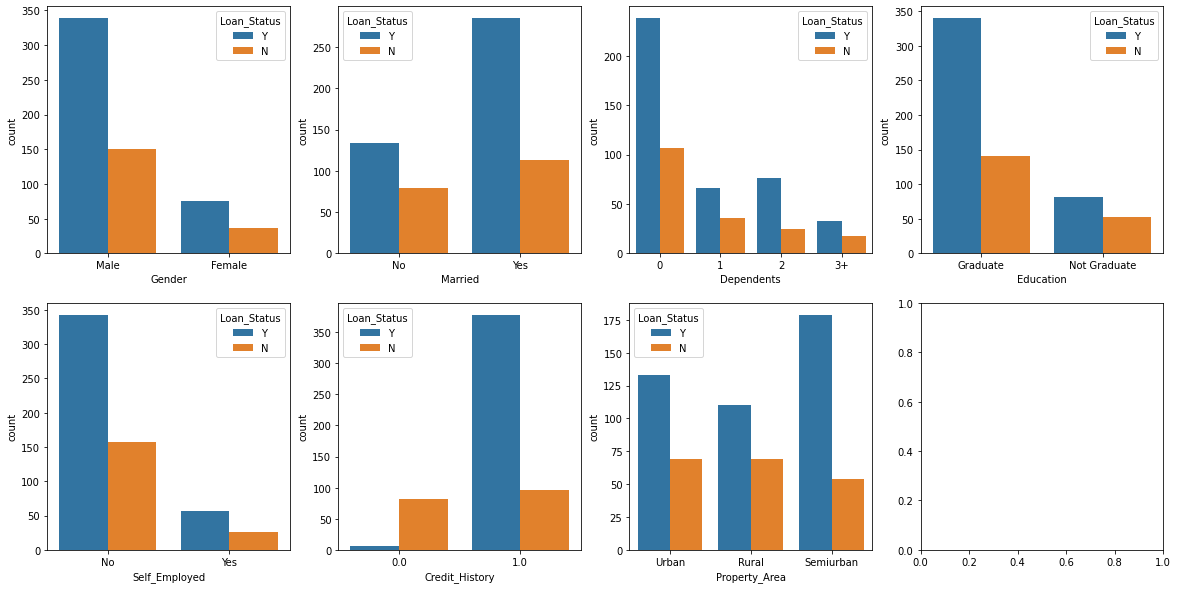

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, feature in enumerate(categorical_cols):
    sns.countplot(x=feature, data=train_data, hue='Loan_Status', ax=axes[i//4, i%4])

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [19]:
cat_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

my_pipeline = ColumnTransformer(transformers=[
    ('cat', cat_processor, categorical_cols),
    ('num', num_processor, numerical_cols)
])
X_train_full = train_data.drop('Loan_Status', axis=1)
y_train_full = LabelEncoder().fit_transform(train_data['Loan_Status'])
X_train_full = my_pipeline.fit_transform(X_train_full, y_train_full)

In [20]:
dataset = pd.DataFrame(X_train_full)
dataset['Loan_Status'] = y_train_full
dataset['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [21]:
from sklearn.utils import resample

data_majority = dataset[dataset['Loan_Status'] == 1] #class 1
data_minority = dataset[dataset['Loan_Status'] == 0] #class 0
data_minority_upsampled = resample(data_minority, replace=True, n_samples=300, random_state=0) 
data_majority_downsampled = resample(data_majority, replace=False, n_samples=300, random_state=0)
data2 = pd.concat([data_majority_downsampled, data_minority_upsampled], ignore_index=True)
print(data2.shape)

data2.head()

(600, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Loan_Status
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.267181,0.117749,-0.511628,0.0,1
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,-0.415596,0.222658,-0.325581,0.0,1
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.049871,0.117749,0.248062,0.0,1
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,-0.449871,1.485036,0.744186,0.0,1
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.161097,-0.517358,-0.124031,0.0,1


In [22]:
np.random.seed(0)
data2 = data2.reindex(np.random.permutation(data2.index))
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Loan_Status
434,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2.977721,0.788552,2.976744,0.0,0
122,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,4.405998,0.462074,-0.651163,0.0,1
224,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.589374,1.505931,0.527132,0.0,1
479,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,-0.113625,-0.517358,0.418605,-324.0,0
205,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,11.621765,-0.517358,0.372093,0.0,1


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2.drop('Loan_Status', axis=1), data2['Loan_Status'],
                                                    test_size=0.17, random_state=0, stratify=data2['Loan_Status'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                 random_state=0)

X_train.shape, X_val.shape, X_test.shape

((397, 21), (100, 21), (103, 21))

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score

kf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
def get_model_best_estimator_and_metrics(estimator, params, kf=kf, X_train=X_train, 
                                         y_train=y_train, X_test=X_val, 
                                         y_test=y_val, is_grid_search=True, 
                                         scoring="f1", n_jobs=2, verbose=0):
    estimator_name = estimator.__class__.__name__.lower()
    if is_grid_search:
        search = GridSearchCV(estimator, param_grid=params, cv=kf, return_train_score=True, 
                              n_jobs=n_jobs, verbose=verbose)
    else:
        search = RandomizedSearchCV(estimator, param_distributions=params, 
                                    cv=kf, scoring=scoring, return_train_score=True,
                                    n_jobs=n_jobs, verbose=verbose)
    search.fit(X_train, y_train)
    cv_score = cross_val_score(search, X_train, y_train, scoring=scoring, cv=kf)
    y_pred = search.best_estimator_.predict(X_test)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_proba = search.best_estimator_.predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    return {
        "estimator_name": estimator_name,
        "best_estimator": search.best_estimator_,
        "cv_score": cv_score,
        "recall": recall,
        "accuracy": accuracy,
        "f1_score": f1,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
    }
res_table = pd.DataFrame(columns=['estimator_name', 'best_estimator', 'cv_score',
                                 'recall', 'accuracy', 'f1_score', 'fpr', 'tpr', 'auc'])

lr_results = get_model_best_estimator_and_metrics(estimator=LogisticRegression(),
                                                  params={'penalty': ['l1', 'l2'],
                                                          'C': [0.001, 0.1, 0.3, 1],
                                                          'solver': ['liblinear']})

res_table = res_table.append(lr_results, ignore_index=True)
res_table.head()

,estimator_name,best_estimator,cv_score,recall,accuracy,f1_score,fpr,tpr,auc
0,logisticregression,"LogisticRegression(C=0.3, solver='liblinear')","[0.6511627906976744, 0.7954545454545455, 0.764...",0.818182,0.73,0.769231,"[0.0, 0.0, 0.0, 0.044444444444444446, 0.044444...","[0.0, 0.01818181818181818, 0.03636363636363636...",0.789899


In [25]:
forest_results = get_model_best_estimator_and_metrics(estimator=RandomForestClassifier(random_state=0),
                                                  params={'n_estimators': [50, 100, 150, 250],
                                                          'criterion': ['gini', 'entropy']})

res_table = res_table.append(forest_results, ignore_index=True)
res_table.head()

,estimator_name,best_estimator,cv_score,recall,accuracy,f1_score,fpr,tpr,auc
0,logisticregression,"LogisticRegression(C=0.3, solver='liblinear')","[0.6511627906976744, 0.7954545454545455, 0.764...",0.818182,0.73,0.769231,"[0.0, 0.0, 0.0, 0.044444444444444446, 0.044444...","[0.0, 0.01818181818181818, 0.03636363636363636...",0.789899
1,randomforestclassifier,"(DecisionTreeClassifier(max_features='auto', r...","[0.7901234567901233, 0.8108108108108107, 0.810...",0.872727,0.88,0.888889,"[0.0, 0.0, 0.0, 0.022222222222222223, 0.022222...","[0.0, 0.01818181818181818, 0.03636363636363636...",0.917172


In [26]:
gb_results = get_model_best_estimator_and_metrics(estimator=GradientBoostingClassifier(random_state=0),
                                                  params={'learning_rate': [0.001, 0.01, 0.1, 0.3],
                                                          'n_estimators': [50, 100, 150, 200]})

res_table = res_table.append(gb_results, ignore_index=True)
res_table.head()

,estimator_name,best_estimator,cv_score,recall,accuracy,f1_score,fpr,tpr,auc
0,logisticregression,"LogisticRegression(C=0.3, solver='liblinear')","[0.6511627906976744, 0.7954545454545455, 0.764...",0.818182,0.73,0.769231,"[0.0, 0.0, 0.0, 0.044444444444444446, 0.044444...","[0.0, 0.01818181818181818, 0.03636363636363636...",0.789899
1,randomforestclassifier,"(DecisionTreeClassifier(max_features='auto', r...","[0.7901234567901233, 0.8108108108108107, 0.810...",0.872727,0.88,0.888889,"[0.0, 0.0, 0.0, 0.022222222222222223, 0.022222...","[0.0, 0.01818181818181818, 0.03636363636363636...",0.917172
2,gradientboostingclassifier,([DecisionTreeRegressor(criterion='friedman_ms...,"[0.7594936708860761, 0.7714285714285716, 0.820...",0.854545,0.83,0.846847,"[0.0, 0.0, 0.0, 0.022222222222222223, 0.022222...","[0.0, 0.01818181818181818, 0.05454545454545454...",0.875556


In [28]:
res_table.set_index('estimator_name', inplace=True)
fig = plt.figure(figsize=(17,7))

for j in res_table.index:
    plt.plot(res_table.loc[j]['fpr'], 
             res_table.loc[j]['tpr'], 
             label="{}, AUC={:.3f}".format(j, res_table.loc[j]['auc']))
    
plt.xlabel("Positive Rate(False)", fontsize=15)
plt.ylabel("Positive Rate(True)", fontsize=15)
plt.title('Models Comparison', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

print("Accuracy on test data")
for i in res_table.index:
    y_test_pred = res_table.loc[i]['best_estimator'].predict(X_test)
    print()
    print(f"{i}: {accuracy_score(y_test, y_test_pred)}")

KeyError: "None of ['estimator_name'] are in the columns"

In [ ]:
index = test_data['Loan_ID']
test_data.drop('Loan_ID', axis=1, inplace=True)
test_data = my_pipeline.transform(test_data)
predictions = res_table.loc['randomforestclassifier']['best_estimator'].predict(test_data)

pred_df = pd.DataFrame(data=predictions, index=index, columns=['Loan_Status'])
pred_df.head(10)